In [1]:
#HR Analytics Employee Attrition Modeling .
#DESCRIPTION
#IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
#Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

#Data Dictionary

#Age: Age of employee
#Attrition: Employee attrition status
#Department: Department of work
#DistanceFromHome
#Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
#EducationField
#EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
#JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
#MaritalStatus
#MonthlyIncome
#NumCompaniesWorked: Number of companies worked prior to IBM
#WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
#YearsAtCompany: Current years of service in IBM
#Analysis Task:
#- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
#- Exploratory data analysis

#Find the age distribution of employees in IBM
#Explore attrition by age
#Explore data for Left employees
#Find out the distribution of employees by the education field
#Give a bar chart for the number of married and unmarried employees
#- Build up a logistic regression model to predict which employees are likely to attrite.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [3]:
dataframe=pd.read_csv("IBM Attrition Data.csv")

In [4]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [5]:
names=dataframe.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


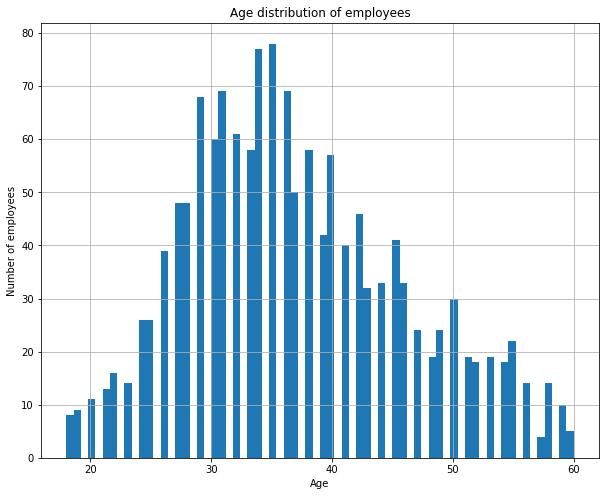

In [6]:
#To find age distribution of employees in IBM through a histogram
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of employees")
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.show()


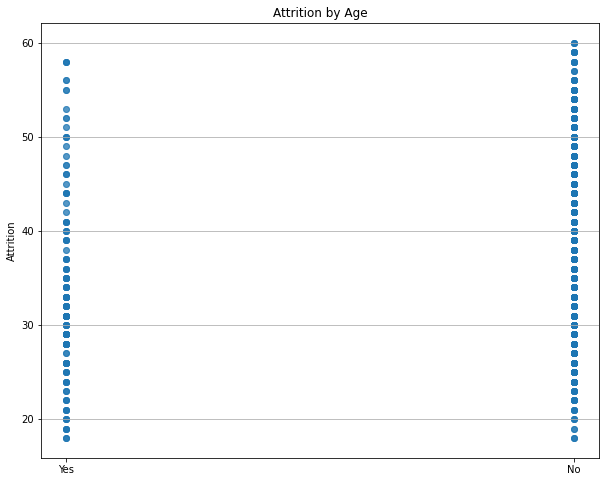

In [7]:
#Explore attrition by age
plt.figure(figsize=(10,8))
plt.scatter(dataframe.Attrition,dataframe.Age,alpha=0.5)
plt.title("Attrition by Age")
plt.grid(b=True,which='major', axis='y')
plt.ylabel("Attrition")
plt.show()

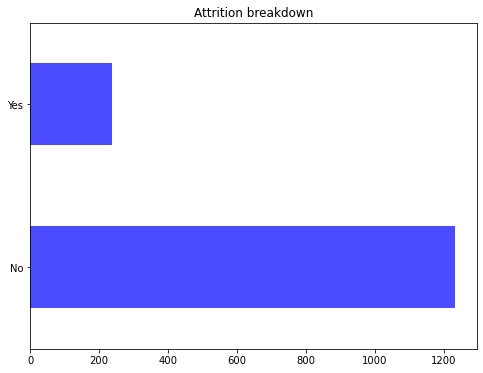

In [8]:
#explore data for left employees
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=0.7)
plt.title("Attrition breakdown")
plt.show()

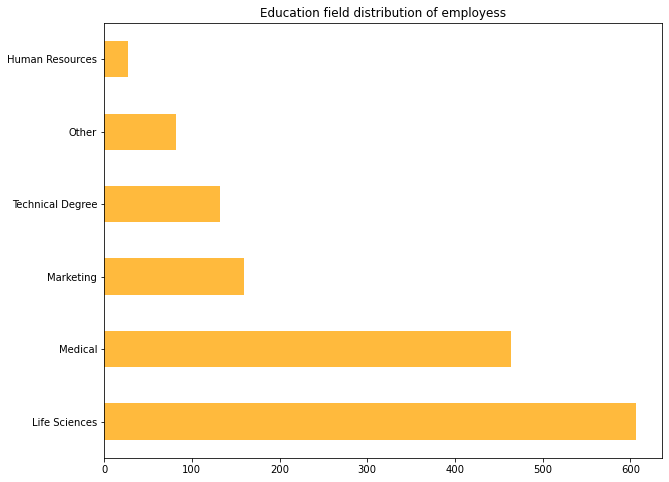

In [9]:
#Explain data for education field distribution
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='orange',alpha=0.76)
plt.title("Education field distribution of employess")
plt.show()

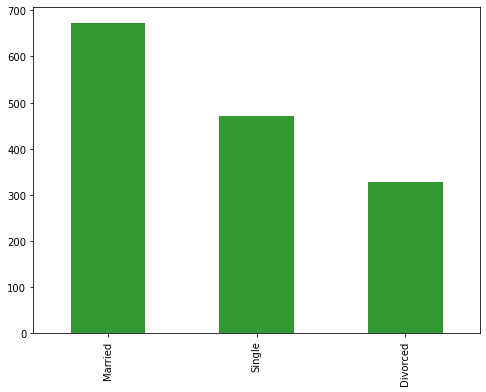

In [10]:
#Explore data for martial status
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',color='green',alpha=0.8)
plt.show()

In [11]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [13]:
dataframe.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [14]:
dataframe.std()

C:\Users\Vasantha\AppData\Local\Temp/ipykernel_11196/3401367348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [15]:
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
dataframe['Attrition'].dtypes

dtype('O')

In [17]:
dataframe['Attrition'].replace('Yes',1,inplace=True) 
dataframe['Attrition'].replace('No',0,inplace=True)
#If we want to overwrite existing dataframe then , inplace =True else inplace=False

In [18]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [21]:
#- Build up a logistic regression model to predict which employees are likely to attrite.
X=dataframe.drop(["Attrition"],axis=1)
X.head()
Y=dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [22]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [23]:
dataframe['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [24]:
dataframe['Department'].replace('Research & Development',1,inplace=True)
dataframe['Department'].replace('Sales',2,inplace=True)
dataframe['Department'].replace('Human Resources',3,inplace=True)

In [25]:
dataframe['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [26]:
dataframe['MaritalStatus'].replace('Married',1,inplace=True)
dataframe['MaritalStatus'].replace('Single',2,inplace=True)
dataframe['MaritalStatus'].replace('Divorced',3,inplace=True)

In [27]:
dataframe['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [29]:
x=dataframe.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [30]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [33]:
y=dataframe['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [40]:
#XGBoost provides a way to convert our training and testing data into DMatrix.
#DMatrix is an optimized data structure that provides better memory efficiency and training speed.
from patsy import dmatrices
y,x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [43]:
#ravel() in Python. The numpy module of Python provides a function called numpy. ravel, 
#which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array(one dimem=ntional array). 
#The returned array has the same data type as the source array or input array.

In [42]:
y=np.ravel(y)

In [48]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model=model.fit(x,y)

#to check accuracy of training test
model.score(x,y)
#The easiest way to check the assumption of independence is using the Durbin Watson test.
#We can conduct this test using R's built-in function called durbinWatsonTest on our model.
#Running this test will give you an output with a p-value, which will help you determine whether the assumption is met or
#not.

0.8408163265306122

In [50]:
y.mean()
#mean() function can be used to calculate mean/average of a given list of numbers.
#It returns mean of the data set passed as parameters. 
#Arithmetic mean is the sum of data divided by the number of data-points

0.16122448979591836

In [53]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [54]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [55]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179618 0.13820382]
 [0.80754591 0.19245409]
 [0.74123918 0.25876082]
 [0.83441341 0.16558659]
 [0.73499931 0.26500069]
 [0.79097736 0.20902264]
 [0.85615193 0.14384807]
 [0.85699667 0.14300333]
 [0.9669906  0.0330094 ]
 [0.93685214 0.06314786]
 [0.95099283 0.04900717]
 [0.8310155  0.1689845 ]
 [0.86296559 0.13703441]
 [0.86581194 0.13418806]
 [0.88750609 0.11249391]
 [0.88892616 0.11107384]
 [0.88569731 0.11430269]
 [0.7851658  0.2148342 ]
 [0.7979449  0.2020551 ]
 [0.88511309 0.11488691]
 [0.70651577 0.29348423]
 [0.94676697 0.05323303]
 [0.86736253 0.13263747]
 [0.84276449 0.15723551]
 [0.60336814 0.39663186]
 [0.81129199 0.18870801]
 [0.91813735 0.08186265]
 [0.93285524 0.06714476]
 [0.68230736 0.31769264]
 [0.87027143 0.12972857]
 [0.87266388 0.12733612]
 [0.76968733 0.23031267]
 [0.86435782 0.13564218]
 [0.95758885 0.04241115]
 [0.84461489 0.15538511]
 [0.86719347 0.13280653]
 [0.90465988 0.09534012]
 [0.68936418 0.31063582]
 [0.90703621 0.09296379]
 [0.8066347  0.1933653 ]


In [56]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [57]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [58]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [59]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571886e-07 9.99999374e-01]]
